In [31]:
import os
import pandas as pd
import glob
from tqdm import tqdm

folder_path = "excel_files"


# Get a list of all .xlsx file paths
xlsx_files = glob.glob(os.path.join(folder_path, "*.xlsx"))

In [32]:
data_list = []

# List all .xlsx files in the folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

for file_name in tqdm(excel_files, desc="Processing files", unit="file"):
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path)

    # Helper function to extract a single value or blank
    def get_value(element):
        values = df.loc[df['Element Name'] == element, 'Fact Value'].values
        return values[0] if len(values) > 0 else ''

    # Extract fields
    corporate_identity = get_value('CorporateIdentityNumber')
    company_name = get_value('NameOfTheCompany')

    # Get all 'MaterialIssueIdentified' values, join as comma-separated string
    material_issues = df.loc[df['Element Name'] == 'MaterialIssueIdentified', 'Fact Value'].dropna()
    material_issues_str = ', '.join(material_issues.astype(str).str.strip())

    # Append row
    data_list.append([
        corporate_identity, company_name, material_issues_str
    ])

# Create final dataframe
report_df = pd.DataFrame(data_list, columns=[
    'CIN', 'Company', 'Material Issues'
])

# Convert company names to proper case
report_df['Company'] = report_df['Company'].str.title()

# Sort as needed
report_df = report_df.sort_values(by='Company')



Processing files: 100%|██████████████████████████████████████████████████████████| 1174/1174 [07:39<00:00,  2.55file/s]


In [33]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)  # Optional: show all rows if needed

report_df[['Company', 'Material Issues']]

Company  \
0                                           360 One Wam Limited   
1                                           3I Infotech Limited   
2                                              3M India Limited   
3                                        5Paisa Capital Limited   
4                                 63 Moons Technologies Limited   
5                                           Aarti Drugs Limited   
6                                      Aarti Industries Limited   
7                                      Aarti Pharmalabs Limited   
8                                      Aavas Financiers Limited   
9                                        Abans Holdings Limited   
10                                            Abb India Limited   
12                                                  Acc Limited   
11                              Accelya Solutions India Limited   
13                        Action Construction Equipment Limited   
14                               Adani Energy Solutions Limited   
15                                    Adani Enterprises Limited   
16                                   Adani Green Energy Limited   
17                Adani Ports And Special Economic Zone Limited   
18                                          Adani Power Limited   
19                                      Adani Total Gas Limited   
20                                         Adani Wilmar Limited   
21                                            Adf Foods Limited   
22                                 Aditya Birla Capital Limited   
23                      Aditya Birla Fashion And Retail Limited   
24                            Aditya Birla Sun Life Amc Limited   
25                                         Ador Welding Limited   
26                         Advanced Enzyme Technologies Limited   
27                                      Aegis Logistics Limited   
28                                    Aether Industries Limited   
29                                        Affle (India) Limited   
30                       Agarwal Industrial Corporation Limited   
31                                         Agi Greenpac Limited   
32                                      Agro Tech Foods Limited   
33                            Ags Transact Technologies Limited   
34                          Ahluwalia Contracts (India) Limited   
35                                      Aia Engineering Limited   
36                                        Ajanta Pharma Limited   
37                          Ajmera Realty & Infra India Limited   
38                                     Akzo Nobel India Limited   
39                                              Alembic Limited   
40                              Alembic Pharmaceuticals Limited   
41                                     Alicon Castalloy Limited   
42                                   Alkem Laboratories Limited   
43                               Alkyl Amines Chemicals Limited   
44                                        Allcargo Gati Limited   
45                                   Allcargo Logistics Limited   
46                                  Allsec Technologies Limited   
47                                      Alok Industries Limited   
48                              Amber Enterprises India Limited   
49                                  Ambika Cotton Mills Limited   
50                                       Ambuja Cements Limited   
51                                         Ami Organics Limited   
52                               Amrutanjan Health Care Limited   
53                                   Anand Rathi Wealth Limited   
54                                            Anant Raj Limited   
55                                         Andhra Paper Limited   
56                                            Angel One Limited   
57                               Anjani Portland Cement Limited   
58                           Antony Waste Handling Cell Limited   
59                                 A

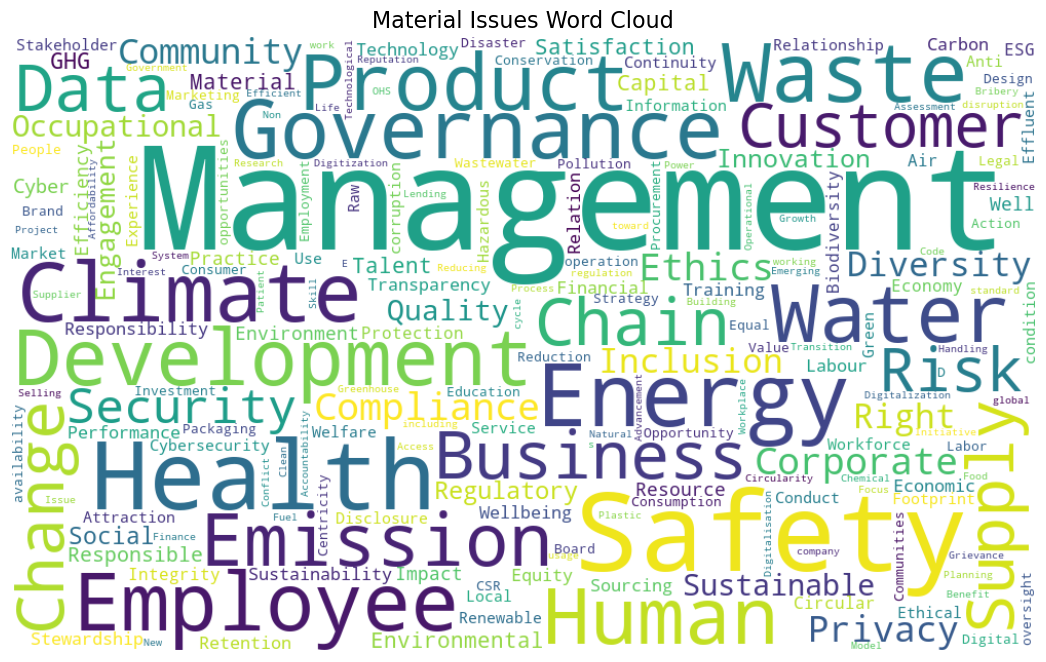

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all material issues into a single string
all_issues_text = ' '.join(report_df['Material Issues'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', collocations=False).generate(all_issues_text)

# Display the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Material Issues Word Cloud', fontsize=16)
plt.show()


In [35]:
report_df.isnull().sum()

CIN                0
Company            0
Material Issues    0
dtype: int64

In [36]:
empty_counts = (report_df.fillna('').applymap(str).applymap(str.strip) == '').sum()
print(empty_counts)
report_df[report_df.fillna('').applymap(str).applymap(str.strip).eq('').any(axis=1)]

CIN                 0
Company             0
Material Issues    54
dtype: int64


C:\Users\manoj\AppData\Local\Temp\ipykernel_2000\1016194574.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_counts = (report_df.fillna('').applymap(str).applymap(str.strip) == '').sum()
C:\Users\manoj\AppData\Local\Temp\ipykernel_2000\1016194574.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report_df[report_df.fillna('').applymap(str).applymap(str.strip).eq('').any(axis=1)]


CIN  \
4     L29142TN1988PLC015586   
38    L24292WB1954PLC021516   
102   L15142TN1986PLC012780   
104   L65110GJ1993PLC020769   
105   U74210TG1983PLC004132   
113   L65100PN1945PLC004656   
121   L01131UP1980PLC004984   
122   L51100GJ1961PLC001039   
150   L45200GJ2015PLC083577   
157   L74999DL2016PLC298207   
172   L74899DL1995PLC065551   
173   L74100MH1993PLC075361   
176   L74899DL1989PLC034995   
200   L51909PB1994PLC015083   
222   L24120TG1961PLC000892   
223   L92114DL1976PLC008355   
224   L28991TZ1986PLC001816   
247   L14292GJ2006PLC049371   
268   L67100GJ1983PLC126089   
290   L21019WB1981PLC034161   
417   L31900DL1983PLC016304   
433   L51101UP2010PLC042382   
509   L99999GJ1976PLC018945   
540   L52601PB2017PLC046545   
573   L26924HR1985PLC056150   
641   L35912MH1975PLC018376   
679   L51909DL1963GOI004033   
698   L65190MH1992PLC066228   
700   L24219TG1986PLC016607   
702   L45202PB2006PLC029968   
725   L74110MH2013PLC248874   
730   L40101HR1975GOI032564   
742   L74899DL1989PLC034594   
743   L24304MH2016PLC320868   
745   L26940MH1999PLC118229   
783   L24131WB1948PLC095302   
787   L25192MH1981PLC024837   
800   L74140TG1999PLC032156   
850   L65191PN1943PLC007308   
853   L74101UP2021PLC156659   
868   L31100MH1982PLC028406   
896   L18209TG1985PLC005581   
919   L29120MP1995PLC009327   
925   L74899DL1986PLC023202   
929   L70109MH2021GOI371256   
930   L63030MH1950GOI008033   
935   L26940GJ1944PLC000749   
994   L27100MH1984PLC034003   
1074  L31200GJ2004PLC044068   
1084  L35999TN1962PLC004792   
1116  L36911RJ1989PLC004945   
1117  L65990MH1990PLC056669   
1125  L74899DL1995PLC069839   
1158  L72200KA2002PLC030072   

                                                    Company Material Issues  
4                             63 Moons Technologies Limited                  
38                                 Akzo Nobel India Limited                  
102                            Avt Natural Products Limited                  
104                                       Axis Bank Limited                  
105                                Azad Engineering Limited                  
113                     Bajaj Holdings & Investment Limited                  
121                                   Banaras Beads Limited                  
122                              Banco Products (I) Limited                  
150                            Bigbloc Construction Limited                  
157                                  Bls E-Services Limited                  
172                               C.E. Info Systems Limited                  
173                            Camlin Fine Sciences Limited                  
176                           Cantabil Retail India Limited                  
200                        Chaman Lal Setia Exports Limited                  
222                        Coromandel International Limited                  
223                                     Cosmo First Limited                  
224                            Craftsman Automation Limited                  
247                                 Deep Industries Limited                  
268                                  Dolat Algotech Limited                  
290                               Emami Paper Mills Limited                  
417                                   Havells India Limited                  
433                                     Hexa Tradex Limited                  
509                                      Inox India Limited                  
540                            Jeena Sikho Lifecare Limited                  
573                                Kajaria Ceramics Limited                  
641                            Maharashtra Scooters Limited                  
679                                            Mmtc Limited                  
698                                Muthoot Microfin Limited                  
700                                 Nacl Industries Limi

In [37]:
report_df

CIN  \
0     L74140MH2008PLC177884   
1     L67120MH1993PLC074411   
2     L31300KA1987PLC013543   
3     L67190MH2007PLC289249   
4     L29142TN1988PLC015586   
5     L37060MH1984PLC055433   
6     L24110GJ1984PLC007301   
7     L24100GJ2019PLC110964   
8     L65922RJ2011PLC034297   
9     L74900MH2009PLC231660   
10    L32202KA1949PLC032923   
12    L26940GJ1936PLC149771   
11    L74140PN1986PLC041033   
13    L74899HR1995PLC053860   
14    L40300GJ2013PLC077803   
15    L51100GJ1993PLC019067   
16    L40106GJ2015PLC082007   
17    L63090GJ1998PLC034182   
18    L40100GJ1996PLC030533   
19    L40100GJ2005PLC046553   
20    L15146GJ1999PLC035320   
21    L15400GJ1990PLC014265   
22    L67120GJ2007PLC058890   
23    L18101MH2007PLC233901   
24    L65991MH1994PLC080811   
25    L70100MH1951PLC008647   
26    L24200MH1989PLC051018   
27    L63090GJ1956PLC001032   
28    L24100GJ2013PLC073434   
29    L65990DL1994PLC408172   
30    L99999MH1995PLC084618   
31    L51433WB1960PLC024539   
32    L15142TG1986PLC006957   
33    L72200MH2002PLC138213   
34    L45101DL1979PLC009654   
35    L29259GJ1991PLC015182   
36    L24230MH1979PLC022059   
37    L27104MH1985PLC035659   
38    L24292WB1954PLC021516   
39    L26100GJ1907PLC000033   
40    L24230GJ2010PLC061123   
41    L99999PN1990PLC059487   
42    L00305MH1973PLC174201   
43    L99999MH1979PLC021796   
44    L63011MH1995PLC420155   
45    L63010MH2004PLC073508   
46    L72300TN1998PLC041033   
47    L17110DN1986PLC000334   
48    L28910PB1990PLC010265   
49    L17115TZ1988PLC002269   
50    L26942GJ1981PLC004717   
51    L24100GJ2007PLC051093   
52    L24231TN1936PLC000017   
53    L67120MH1995PLC086696   
54    L45400HR1985PLC021622   
55    L21010AP1964PLC001008   
56    L67120MH1996PLC101709   
57    L26942TG1983PLC157712   
58    L90001MH2001PLC130485   
59    L24231GJ2003PLC042988   
60    L91110GJ1989PLC012802   
61    L99999MH1986PLC039199   
62    L85110WB1987PLC222139   
63    L15490AP2012PLC080067   
64    L74899DL1986PLC023443   
65    L85110TN1979PLC008035   
66    L72200TG1997PLC026556   
67    L65999DL1985PLC022723   
68    L25111KL1972PLC002449   
69    L72900MH2000PLC123841   
70    L65922TN2009PLC073881   
71    L24298TN2009PLC072270   
72    L66120MP1992PLC007182   
73    L55910GJ1992PLC018623   
74    L85110DL2004PLC126414   
75    L52399GJ2016PLC085595   
76    L17119GJ1931PLC000093   
77    L45201GJ2008PLC055771   
78    L26102DL1984PLC019542   
79    L14108MH1982PLC026396   
80    L70109WB1986PLC040864   
82    L34101TN1948PLC000105   
81    L45200MH1993PLC071970   
83    L24220MH1945PLC004598   
84    L34300DL1988PLC030342   
85    L99999MH1994PLC076236   
86    L85110KA2008PLC147259   
89    L29309TG1991PLC013203   
87    L25200GJ1996PLC029134   
88    L24231KA1979PLC003563   
90    L99999GJ1975PLC002859   
97    L36911RJ1996PLC011381   
91    L99999MH1997PLC111637   
92    L24239TG1986PLC015190   
93    L51109MH1982PLC319008   
94    L34300PN1996PLC104510   
95    L51909KA1981PLC004198   
96    L28932PN1990PLC016314   
98    L15122UP2015PLC069635   
99    L30007TN1999PLC043479   
100   L16001AP1993PLC095778   
101   L51900MH2000PLC126473   
102   L15142TN1986PLC012780   
104   L65110GJ1993PLC020769   
103   L72200KA1990PLC084435   
105   U74210TG1983PLC004132   
106   L65993PN2007PLC130076   
107   L01110RJ2006PLC047173   
108   L31500MH1938PLC009887   
109   L65910MH1987PLC042961   
110   L65923PN2007PLC130075   
111   L99999MH1993PLC072892   
112   L15420UP1931PLC065243   
113   L65100PN1945PLC004656   
114   L31900MH2023PLC375133   
115   L24132MH1988PLC049387   
116   L25191TG1942PLC121598   
117   L99999MH1961PLC012185   
118   L15492WB1924GOI004835   
119   L15421WB1975PLC030118   
120   L29100MH1989PLC255933   
121   L01131UP1980PLC004984   
122   L51100GJ1961PLC001039   
123   L67190WB2014PLC204622   
124   L01234KA2023PTC567891   
125   U99999MH1906PLC000243   
126   U99999MH1935PTC002399   
127   L15421TZ1983PLC001358   
128   L55101KA2006PLC0730

In [38]:
report_df.to_excel('material_issues.xlsx', index=False)

In [39]:
final_df = pd.read_excel('material_issues.xlsx')
sector_df = pd.read_excel('nse_data.xlsx')

In [40]:
# Clean names in both dataframes first
final_df['Company_clean'] = report_df['Company'].apply(clean_name)
sector_df['Company_clean'] = sector_df['Company'].apply(clean_name)

# Merge to bring in sector info
final_df = final_df.merge(
    sector_df[['Company_clean', 'Sector']],
    on='Company_clean',
    how='left'
)

# Drop helper
final_df.drop(columns=['Company_clean'], inplace=True)


In [41]:
exploded_df = (
    final_df[['Company', 'Material Issues', 'Sector']]
    .dropna(subset=['Material Issues'])
    .assign(Material_Issue_Split=lambda df: df['Material Issues'].str.split(',\s*'))
    .explode('Material_Issue_Split')
)

# Clean it up
exploded_df['Material_Issue_Split'] = exploded_df['Material_Issue_Split'].str.strip()
exploded_df = exploded_df[exploded_df['Material_Issue_Split'] != '']
exploded_df.rename(columns={'Material_Issue_Split': 'Issue'}, inplace=True)


In [42]:
exploded_df.to_excel('material_issues_wordcloud.xlsx', index=False)